**OBJECTIVE**

We are going to analyse the US based Lending Club's online Loan applicants data which is regarding loan accepted applicants and rejected applicants from Lending club's side.

So to understand the hidden patterns in the dataset we are going to apply Data cleaning process, Feature selection, Feature Engineering, EDA and Visualization. Then we are going to build a optimising Machine Learning model which will help the Lending Club and Lenders to decide whom to provide loan and whom to not, and then finally we gonna deploy that model into cloud server for the ease of end user.

In [5]:
#importing python libraries for analysis:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [6]:
#Let's mount the google drive with colab:

from google.colab import drive
drive.mount("/content/drive")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [7]:
#Loading Loan Accepted Dataset from Google Drive:

df_Accepted = pd.read_csv("/content/drive/MyDrive/Kaggle/accepted_2007_to_2018q4.csv/accepted_2007_to_2018Q4.csv") #Path of my Google drive source
df_Accepted.head()

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (0,19,49,59,118,129,130,131,134,135,136,139,145,146,147) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,fico_range_low,fico_range_high,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,...,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit,revol_bal_joint,sec_app_fico_range_low,sec_app_fico_range_high,sec_app_earliest_cr_line,sec_app_inq_last_6mths,sec_app_mort_acc,sec_app_open_acc,sec_app_revol_util,sec_app_open_act_il,sec_app_num_rev_accts,sec_app_chargeoff_within_12_mths,sec_app_collections_12_mths_ex_med,sec_app_mths_since_last_major_derog,hardship_flag,hardship_type,hardship_reason,hardship_status,deferral_term,hardship_amount,hardship_start_date,hardship_end_date,payment_plan_start_date,hardship_length,hardship_dpd,hardship_loan_status,orig_projected_additional_accrued_interest,hardship_payoff_balance_amount,hardship_last_payment_amount,disbursement_method,debt_settlement_flag,debt_settlement_flag_date,settlement_status,settlement_date,settlement_amount,settlement_percentage,settlement_term
0,68407277,NaN,3600.0,3600.0,3600.0,36 months,13.99,123.03,C,C4,leadman,10+ years,MORTGAGE,55000.0,Not Verified,Dec-2015,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,NaN,debt_consolidation,Debt consolidation,190xx,PA,5.91,0.0,Aug-2003,675.0,679.0,1.0,30.0,NaN,7.0,0.0,2765.0,29.7,13.0,w,0.00,0.00,...,178050.0,7746.0,2400.0,13734.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
1,68355089,NaN,24700.0,24700.0,24700.0,36 months,11.99,820.28,C,C1,Engineer,10+ years,MORTGAGE,65000.0,Not Verified,Dec-2015,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,NaN,small_business,Business,577xx,SD,16.06,1.0,Dec-1999,715.0,719.0,4.0,6.0,NaN,22.0,0.0,21470.0,19.2,38.0,w,0.00,0.00,...,314017.0,39475.0,79300.0,24667.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
2,68341763,NaN,20000.0,20000.0,20000.0,60 months,10.78,432.66,B,B4,truck driver,10+ years,MORTGAGE,63000.0,Not Verified,Dec-2015,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,NaN,home_improvement,NaN,605xx,IL,10.78,0.0,Aug-2000,695.0,699.0,0.0,NaN,NaN,6.0,0.0,7869.0,56.2,18.0,w,0.00,0.00,...,218418.0,18696.0,6200.0,14877.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
3,66310712,NaN,35000.0,35000.0,35000.0,60 months,14.85,829.90,C,C5,Information Systems Officer,10+ years,MORTGAGE,110000.0,Source Verified,Dec-2015,Current,n,https://lendingclub.com/browse/loanDetail.acti...,NaN,debt_consolidation,Debt consolidation,076xx,NJ,17.06,0.0,Sep-2008,785.0,789.0,0.0,NaN,NaN,13.0,0.0,7802.0,11.6,17.0,w,15897.65,15897.65,...,381215.0,52226.0,62500.0,18000.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
4,68476807,NaN,10400.0,10400.0,10400.0,60 months,22.45,289.91,F,F1,Contract Specialist,3 years,MORTGAGE,104433.0,Source Verified,Dec-2015,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,NaN,major_purchase,Major purchase,174xx,PA,25.37,1.0,Jun-1998,695.0,699.0,3.0,12.0,NaN,12.0,0.0,21929.0,64.5,35.0,w,0.00,0.00,...,439570.0,95768.0,20300.0,88097.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN


In [8]:
df_Accepted.shape

(2260701, 151)

In [9]:
df_Accepted.columns

Index(['id', 'member_id', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv',
       'term', 'int_rate', 'installment', 'grade', 'sub_grade',
       ...
       'hardship_payoff_balance_amount', 'hardship_last_payment_amount',
       'disbursement_method', 'debt_settlement_flag',
       'debt_settlement_flag_date', 'settlement_status', 'settlement_date',
       'settlement_amount', 'settlement_percentage', 'settlement_term'],
      dtype='object', length=151)

In [10]:
List = list(df_Accepted.columns)
print(List)

['id', 'member_id', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv', 'term', 'int_rate', 'installment', 'grade', 'sub_grade', 'emp_title', 'emp_length', 'home_ownership', 'annual_inc', 'verification_status', 'issue_d', 'loan_status', 'pymnt_plan', 'url', 'desc', 'purpose', 'title', 'zip_code', 'addr_state', 'dti', 'delinq_2yrs', 'earliest_cr_line', 'fico_range_low', 'fico_range_high', 'inq_last_6mths', 'mths_since_last_delinq', 'mths_since_last_record', 'open_acc', 'pub_rec', 'revol_bal', 'revol_util', 'total_acc', 'initial_list_status', 'out_prncp', 'out_prncp_inv', 'total_pymnt', 'total_pymnt_inv', 'total_rec_prncp', 'total_rec_int', 'total_rec_late_fee', 'recoveries', 'collection_recovery_fee', 'last_pymnt_d', 'last_pymnt_amnt', 'next_pymnt_d', 'last_credit_pull_d', 'last_fico_range_high', 'last_fico_range_low', 'collections_12_mths_ex_med', 'mths_since_last_major_derog', 'policy_code', 'application_type', 'annual_inc_joint', 'dti_joint', 'verification_status_joint', 'acc_now_delinq',

In [11]:
List.sort()

print(List)

['acc_now_delinq', 'acc_open_past_24mths', 'addr_state', 'all_util', 'annual_inc', 'annual_inc_joint', 'application_type', 'avg_cur_bal', 'bc_open_to_buy', 'bc_util', 'chargeoff_within_12_mths', 'collection_recovery_fee', 'collections_12_mths_ex_med', 'debt_settlement_flag', 'debt_settlement_flag_date', 'deferral_term', 'delinq_2yrs', 'delinq_amnt', 'desc', 'disbursement_method', 'dti', 'dti_joint', 'earliest_cr_line', 'emp_length', 'emp_title', 'fico_range_high', 'fico_range_low', 'funded_amnt', 'funded_amnt_inv', 'grade', 'hardship_amount', 'hardship_dpd', 'hardship_end_date', 'hardship_flag', 'hardship_last_payment_amount', 'hardship_length', 'hardship_loan_status', 'hardship_payoff_balance_amount', 'hardship_reason', 'hardship_start_date', 'hardship_status', 'hardship_type', 'home_ownership', 'id', 'il_util', 'initial_list_status', 'inq_fi', 'inq_last_12m', 'inq_last_6mths', 'installment', 'int_rate', 'issue_d', 'last_credit_pull_d', 'last_fico_range_high', 'last_fico_range_low', '

In [12]:
pd.set_option('display.max_rows', 200)
pd.set_option('display.max_columns', 151)
pd.set_option('display.max_colwidth', 2000)
pd.set_option('max_colwidth', 2000)
pd.options.display.float_format = '{:.3f}'.format

In [13]:
#There's an external file which is helping us to understand the features description better. let's import it from Google Drive:

df_Description = pd.read_excel("/content/drive/MyDrive/Kaggle/LCDataDictionary.xlsx", sheet_name = 0, index_col = 0) #Path of my Google drive source
df_Description

,Description
LoanStatNew,
acc_now_delinq,The number of accounts on which the borrower is now delinquent.
acc_open_past_24mths,Number of trades opened in past 24 months.
addr_state,The state provided by the borrower in the loan application
all_util,Balance to credit limit on all trades
annual_inc,The self-reported annual income provided by the borrower during registration.
annual_inc_joint,The combined self-reported annual income provided by the co-borrowers during registration
application_type,Indicates whether the loan is an individual application or a joint application with two co-borrowers
avg_cur_bal,Average current balance of all accounts
bc_open_to_buy,Total open to buy on revolving bankcards.


In [14]:
df_Description.index

Index([           'acc_now_delinq',      'acc_open_past_24mths',
                      'addr_state',                  'all_util',
                      'annual_inc',          'annual_inc_joint',
                'application_type',               'avg_cur_bal',
                  'bc_open_to_buy',                   'bc_util',
       ...
             'disbursement_method',      'debt_settlement_flag',
       'debt_settlement_flag_date',         'settlement_status',
                 'settlement_date',         'settlement_amount',
           'settlement_percentage',           'settlement_term',
                               nan,                         nan],
      dtype='object', name='LoanStatNew', length=153)

In [15]:
df_Accepted.isnull().sum().sort_values(ascending=False).head(60)

member_id                                     2260701
orig_projected_additional_accrued_interest    2252050
hardship_loan_status                          2249784
hardship_dpd                                  2249784
hardship_reason                               2249784
hardship_status                               2249784
deferral_term                                 2249784
hardship_amount                               2249784
hardship_start_date                           2249784
hardship_end_date                             2249784
payment_plan_start_date                       2249784
hardship_length                               2249784
hardship_type                                 2249784
hardship_payoff_balance_amount                2249784
hardship_last_payment_amount                  2249784
settlement_percentage                         2226455
debt_settlement_flag_date                     2226455
settlement_status                             2226455
settlement_date             

In [16]:
Missing_Value_PCT = df_Accepted.isnull().mean().sort_values(ascending=False)*100
Missing_Value_PCT

member_id                                    100.000
orig_projected_additional_accrued_interest    99.617
hardship_loan_status                          99.517
hardship_dpd                                  99.517
hardship_reason                               99.517
hardship_status                               99.517
deferral_term                                 99.517
hardship_amount                               99.517
hardship_start_date                           99.517
hardship_end_date                             99.517
payment_plan_start_date                       99.517
hardship_length                               99.517
hardship_type                                 99.517
hardship_payoff_balance_amount                99.517
hardship_last_payment_amount                  99.517
settlement_percentage                         98.485
debt_settlement_flag_date                     98.485
settlement_status                             98.485
settlement_date                               

 **Since our dataset contains 2.2M records, its good to drop features which contains more than 25% of missing values..
May some features have valid numerical data, maybe we can think of imputing some mean or median with those missing, 
but due to large portion of missing(aprox 565175) it'll affect the accuracy of the prediction**

**So i am deciding to drop those more than 25% Missing value Features**


In [17]:
Missing_Value_PCT[Missing_Value_PCT>25]

member_id                                    100.000
orig_projected_additional_accrued_interest    99.617
hardship_loan_status                          99.517
hardship_dpd                                  99.517
hardship_reason                               99.517
hardship_status                               99.517
deferral_term                                 99.517
hardship_amount                               99.517
hardship_start_date                           99.517
hardship_end_date                             99.517
payment_plan_start_date                       99.517
hardship_length                               99.517
hardship_type                                 99.517
hardship_payoff_balance_amount                99.517
hardship_last_payment_amount                  99.517
settlement_percentage                         98.485
debt_settlement_flag_date                     98.485
settlement_status                             98.485
settlement_date                               

In [18]:
Missing_features = list(Missing_Value_PCT[Missing_Value_PCT>25].index)
Missing_features

['member_id',
 'orig_projected_additional_accrued_interest',
 'hardship_loan_status',
 'hardship_dpd',
 'hardship_reason',
 'hardship_status',
 'deferral_term',
 'hardship_amount',
 'hardship_start_date',
 'hardship_end_date',
 'payment_plan_start_date',
 'hardship_length',
 'hardship_type',
 'hardship_payoff_balance_amount',
 'hardship_last_payment_amount',
 'settlement_percentage',
 'debt_settlement_flag_date',
 'settlement_status',
 'settlement_date',
 'settlement_amount',
 'settlement_term',
 'sec_app_mths_since_last_major_derog',
 'sec_app_revol_util',
 'revol_bal_joint',
 'sec_app_chargeoff_within_12_mths',
 'sec_app_num_rev_accts',
 'sec_app_open_act_il',
 'sec_app_open_acc',
 'sec_app_mort_acc',
 'sec_app_inq_last_6mths',
 'sec_app_earliest_cr_line',
 'sec_app_fico_range_high',
 'sec_app_fico_range_low',
 'sec_app_collections_12_mths_ex_med',
 'verification_status_joint',
 'dti_joint',
 'annual_inc_joint',
 'desc',
 'mths_since_last_record',
 'mths_since_recent_bc_dlq',
 'mths_

In [19]:
len(Missing_features)

58

In [20]:
Missing_index = []
for i in Missing_features:
  if i in df_Description.index:
    Missing_index.append(i)

print(Missing_index)

['member_id', 'orig_projected_additional_accrued_interest', 'hardship_loan_status', 'hardship_dpd', 'hardship_reason', 'hardship_status', 'deferral_term', 'hardship_amount', 'hardship_start_date', 'hardship_end_date', 'payment_plan_start_date', 'hardship_length', 'hardship_type', 'hardship_payoff_balance_amount', 'hardship_last_payment_amount', 'settlement_percentage', 'debt_settlement_flag_date', 'settlement_status', 'settlement_date', 'settlement_amount', 'settlement_term', 'sec_app_open_act_il', 'dti_joint', 'annual_inc_joint', 'desc', 'mths_since_last_record', 'mths_since_recent_bc_dlq', 'mths_since_last_major_derog', 'mths_since_recent_revol_delinq', 'next_pymnt_d', 'mths_since_last_delinq', 'il_util', 'mths_since_rcnt_il', 'all_util', 'open_acc_6m', 'total_cu_tl', 'inq_last_12m', 'open_il_12m', 'open_il_24m', 'total_bal_il', 'open_act_il', 'open_rv_12m', 'open_rv_24m', 'max_bal_bc', 'inq_fi']


In [21]:
#You may read the feature description which you're gonna drop and make sure whether is this really necessary or not?

df_Description.loc[Missing_index]

,Description
LoanStatNew,
member_id,A unique LC assigned Id for the borrower member.
orig_projected_additional_accrued_interest,The original projected additional interest amount that will accrue for the given hardship payment plan as of the Hardship Start Date. This field will be null if the borrower has broken their hardship payment plan.
hardship_loan_status,Loan Status as of the hardship plan start date
hardship_dpd,Account days past due as of the hardship plan start date
hardship_reason,Describes the reason the hardship plan was offered
hardship_status,"Describes if the hardship plan is active, pending, canceled, completed, or broken"
deferral_term,Amount of months that the borrower is expected to pay less than the contractual monthly payment amount due to a hardship plan
hardship_amount,The interest payment that the borrower has committed to make each month while they are on a hardship plan
hardship_start_date,The start date of the hardship plan period


In [22]:
#So we gonna remove those 58 Missing Features from the Loan Accepted Dataset:

df_Accepted.drop(Missing_features, axis=1, inplace=True)

In [23]:
df_Accepted.shape

(2260701, 93)

**LETS REMOVE SOME UNWANTED COLUMNS WHICH WILL NOT SUPPORT IN OUR ANALYSIS**

In [24]:
#Let's read the available 93 columns description:

Col_present = list(df_Accepted.columns)
Col_present

['id',
 'loan_amnt',
 'funded_amnt',
 'funded_amnt_inv',
 'term',
 'int_rate',
 'installment',
 'grade',
 'sub_grade',
 'emp_title',
 'emp_length',
 'home_ownership',
 'annual_inc',
 'verification_status',
 'issue_d',
 'loan_status',
 'pymnt_plan',
 'url',
 'purpose',
 'title',
 'zip_code',
 'addr_state',
 'dti',
 'delinq_2yrs',
 'earliest_cr_line',
 'fico_range_low',
 'fico_range_high',
 'inq_last_6mths',
 'open_acc',
 'pub_rec',
 'revol_bal',
 'revol_util',
 'total_acc',
 'initial_list_status',
 'out_prncp',
 'out_prncp_inv',
 'total_pymnt',
 'total_pymnt_inv',
 'total_rec_prncp',
 'total_rec_int',
 'total_rec_late_fee',
 'recoveries',
 'collection_recovery_fee',
 'last_pymnt_d',
 'last_pymnt_amnt',
 'last_credit_pull_d',
 'last_fico_range_high',
 'last_fico_range_low',
 'collections_12_mths_ex_med',
 'policy_code',
 'application_type',
 'acc_now_delinq',
 'tot_coll_amt',
 'tot_cur_bal',
 'total_rev_hi_lim',
 'acc_open_past_24mths',
 'avg_cur_bal',
 'bc_open_to_buy',
 'bc_util',
 'ch

In [25]:
col = []
for i in Col_present:
  if i in df_Description.index:
    col.append(i)

print(col)
print(len(col)) #This will help us to select those available 92 features from df_Description, so we can read & understand.

['id', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv', 'term', 'int_rate', 'installment', 'grade', 'sub_grade', 'emp_title', 'emp_length', 'home_ownership', 'annual_inc', 'verification_status', 'issue_d', 'loan_status', 'pymnt_plan', 'url', 'purpose', 'title', 'zip_code', 'addr_state', 'dti', 'delinq_2yrs', 'earliest_cr_line', 'fico_range_low', 'fico_range_high', 'inq_last_6mths', 'open_acc', 'pub_rec', 'revol_bal', 'revol_util', 'total_acc', 'initial_list_status', 'out_prncp', 'out_prncp_inv', 'total_pymnt', 'total_pymnt_inv', 'total_rec_prncp', 'total_rec_int', 'total_rec_late_fee', 'recoveries', 'collection_recovery_fee', 'last_pymnt_d', 'last_pymnt_amnt', 'last_credit_pull_d', 'last_fico_range_high', 'last_fico_range_low', 'collections_12_mths_ex_med', 'policy_code', 'application_type', 'acc_now_delinq', 'tot_coll_amt', 'tot_cur_bal', 'acc_open_past_24mths', 'avg_cur_bal', 'bc_open_to_buy', 'bc_util', 'chargeoff_within_12_mths', 'delinq_amnt', 'mo_sin_old_il_acct', 'mo_sin_old_rev_t

In [26]:
#Read each features description and decide which features are relevant and non-relevant:  Let's read 92 (Col) in the data features

df_Description.loc[col]

,Description
LoanStatNew,
id,A unique LC assigned ID for the loan listing.
loan_amnt,"The listed amount of the loan applied for by the borrower. If at some point in time, the credit department reduces the loan amount, then it will be reflected in this value."
funded_amnt,The total amount committed to that loan at that point in time.
funded_amnt_inv,The total amount committed by investors for that loan at that point in time.
term,The number of payments on the loan. Values are in months and can be either 36 or 60.
int_rate,Interest Rate on the loan
installment,The monthly payment owed by the borrower if the loan originates.
grade,LC assigned loan grade
sub_grade,LC assigned loan subgrade


 **By reading each and every description of the existing features(Col_present), 
i found some important features for further analysis and some non relevant features. So both are listed below and non relevant features must be dropped from the Dataset**

**Important_Features** = ["loan_amnt", "term","int_rate","installment","grade","sub_grade","emp_title","emp_length","home_ownership","annual_inc", "loan_status","purpose","dti", "zip_code", "addr_state","fico_range_low", "fico_range_high","pub_rec","application_type"]

 **Features_Need_to_be_Dropped_From_The_Dataset** = 
['id', 'funded_amnt', 'funded_amnt_inv', 'verification_status', 'issue_d', 'pymnt_plan', 'url', 'title', 'delinq_2yrs', 'earliest_cr_line', 'inq_last_6mths', 'open_acc', 'revol_bal', 'revol_util', 'total_acc', 'initial_list_status', 'out_prncp', 'out_prncp_inv', 'total_pymnt', 'total_pymnt_inv', 'total_rec_prncp', 'total_rec_int', 'total_rec_late_fee', 'recoveries', 'collection_recovery_fee', 'last_pymnt_d', 'last_pymnt_amnt', 'last_credit_pull_d', 'last_fico_range_high', 'last_fico_range_low', 'collections_12_mths_ex_med', 'policy_code', 'acc_now_delinq', 'tot_coll_amt', 'tot_cur_bal', 'total_rev_hi_lim', 'acc_open_past_24mths', 'avg_cur_bal', 'bc_open_to_buy', 'bc_util', 'chargeoff_within_12_mths', 'delinq_amnt', 'mo_sin_old_il_acct', 'mo_sin_old_rev_tl_op', 'mo_sin_rcnt_rev_tl_op', 'mo_sin_rcnt_tl', 'mort_acc', 'mths_since_recent_bc', 'mths_since_recent_inq', 'num_accts_ever_120_pd', 'num_actv_bc_tl', 'num_actv_rev_tl', 'num_bc_sats', 'num_bc_tl', 'num_il_tl', 'num_op_rev_tl', 'num_rev_accts', 'num_rev_tl_bal_gt_0', 'num_sats', 'num_tl_120dpd_2m', 'num_tl_30dpd', 'num_tl_90g_dpd_24m', 'num_tl_op_past_12m', 'pct_tl_nvr_dlq', 'percent_bc_gt_75', 'pub_rec_bankruptcies', 'tax_liens', 'tot_hi_cred_lim', 'total_bal_ex_mort', 'total_bc_limit', 'total_il_high_credit_limit', 'hardship_flag', 'disbursement_method', 'debt_settlement_flag']

Even in the Important_Features(has 19 column) is not a Finalised Features for modeling, maybe after done with some EDA and visualization part, if there is any irrelavance then we can drop them..

In [27]:
Important_Features = ["loan_amnt", "term","int_rate","installment","grade","sub_grade","emp_title","emp_length","home_ownership","annual_inc",
                      "loan_status","purpose","dti", "zip_code", "addr_state","fico_range_low","fico_range_high","pub_rec","application_type"]

Features_Need_to_be_Dropped = []
for i in Col_present:
  if i in Important_Features:
    pass
  else:
    Features_Need_to_be_Dropped.append(i)


print(Features_Need_to_be_Dropped)

['id', 'funded_amnt', 'funded_amnt_inv', 'verification_status', 'issue_d', 'pymnt_plan', 'url', 'title', 'delinq_2yrs', 'earliest_cr_line', 'inq_last_6mths', 'open_acc', 'revol_bal', 'revol_util', 'total_acc', 'initial_list_status', 'out_prncp', 'out_prncp_inv', 'total_pymnt', 'total_pymnt_inv', 'total_rec_prncp', 'total_rec_int', 'total_rec_late_fee', 'recoveries', 'collection_recovery_fee', 'last_pymnt_d', 'last_pymnt_amnt', 'last_credit_pull_d', 'last_fico_range_high', 'last_fico_range_low', 'collections_12_mths_ex_med', 'policy_code', 'acc_now_delinq', 'tot_coll_amt', 'tot_cur_bal', 'total_rev_hi_lim', 'acc_open_past_24mths', 'avg_cur_bal', 'bc_open_to_buy', 'bc_util', 'chargeoff_within_12_mths', 'delinq_amnt', 'mo_sin_old_il_acct', 'mo_sin_old_rev_tl_op', 'mo_sin_rcnt_rev_tl_op', 'mo_sin_rcnt_tl', 'mort_acc', 'mths_since_recent_bc', 'mths_since_recent_inq', 'num_accts_ever_120_pd', 'num_actv_bc_tl', 'num_actv_rev_tl', 'num_bc_sats', 'num_bc_tl', 'num_il_tl', 'num_op_rev_tl', 'num_

In [28]:
Important_Features = ["loan_amnt", "term","int_rate","installment","grade","sub_grade","emp_title","emp_length","home_ownership","annual_inc","loan_status","purpose","dti", "zip_code", "addr_state","fico_range_low","fico_range_high","pub_rec","application_type"]

Features_Need_to_be_Dropped = ['id', 'funded_amnt', 'funded_amnt_inv', 'verification_status', 'issue_d', 'pymnt_plan', 'url', 'title', 'delinq_2yrs', 'earliest_cr_line', 'inq_last_6mths', 'open_acc', 'revol_bal', 'revol_util', 'total_acc', 'initial_list_status', 'out_prncp', 'out_prncp_inv', 'total_pymnt', 'total_pymnt_inv', 'total_rec_prncp', 'total_rec_int', 'total_rec_late_fee', 'recoveries', 'collection_recovery_fee', 'last_pymnt_d', 'last_pymnt_amnt', 'last_credit_pull_d', 'last_fico_range_high', 'last_fico_range_low', 'collections_12_mths_ex_med', 'policy_code', 'acc_now_delinq', 'tot_coll_amt', 'tot_cur_bal', 'total_rev_hi_lim', 'acc_open_past_24mths', 'avg_cur_bal', 'bc_open_to_buy', 'bc_util', 'chargeoff_within_12_mths', 'delinq_amnt', 'mo_sin_old_il_acct', 'mo_sin_old_rev_tl_op', 'mo_sin_rcnt_rev_tl_op', 'mo_sin_rcnt_tl', 'mort_acc', 'mths_since_recent_bc', 'mths_since_recent_inq', 'num_accts_ever_120_pd', 'num_actv_bc_tl', 'num_actv_rev_tl', 'num_bc_sats', 'num_bc_tl', 'num_il_tl', 'num_op_rev_tl', 'num_rev_accts', 'num_rev_tl_bal_gt_0', 'num_sats', 'num_tl_120dpd_2m', 'num_tl_30dpd', 'num_tl_90g_dpd_24m', 'num_tl_op_past_12m', 'pct_tl_nvr_dlq', 'percent_bc_gt_75', 'pub_rec_bankruptcies', 'tax_liens', 'tot_hi_cred_lim', 'total_bal_ex_mort', 'total_bc_limit', 'total_il_high_credit_limit', 'hardship_flag', 'disbursement_method', 'debt_settlement_flag']


In [29]:
df_Accepted.drop(labels=Features_Need_to_be_Dropped, axis=1, inplace=True)

In [30]:
df_Accepted.shape

(2260701, 19)

In [31]:
df_Accepted.dtypes

loan_amnt           float64
term                 object
int_rate            float64
installment         float64
grade                object
sub_grade            object
emp_title            object
emp_length           object
home_ownership       object
annual_inc          float64
loan_status          object
purpose              object
zip_code             object
addr_state           object
dti                 float64
fico_range_low      float64
fico_range_high     float64
pub_rec             float64
application_type     object
dtype: object

In [32]:
df_Accepted.head()

,loan_amnt,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,loan_status,purpose,zip_code,addr_state,dti,fico_range_low,fico_range_high,pub_rec,application_type
0,3600.000,36 months,13.990,123.030,C,C4,leadman,10+ years,MORTGAGE,55000.000,Fully Paid,debt_consolidation,190xx,PA,5.910,675.000,679.000,0.000,Individual
1,24700.000,36 months,11.990,820.280,C,C1,Engineer,10+ years,MORTGAGE,65000.000,Fully Paid,small_business,577xx,SD,16.060,715.000,719.000,0.000,Individual
2,20000.000,60 months,10.780,432.660,B,B4,truck driver,10+ years,MORTGAGE,63000.000,Fully Paid,home_improvement,605xx,IL,10.780,695.000,699.000,0.000,Joint App
3,35000.000,60 months,14.850,829.900,C,C5,Information Systems Officer,10+ years,MORTGAGE,110000.000,Current,debt_consolidation,076xx,NJ,17.060,785.000,789.000,0.000,Individual
4,10400.000,60 months,22.450,289.910,F,F1,Contract Specialist,3 years,MORTGAGE,104433.000,Fully Paid,major_purchase,174xx,PA,25.370,695.000,699.000,0.000,Individual


In [33]:
df_Accepted["loan_status"].value_counts()

Fully Paid                                             1076751
Current                                                 878317
Charged Off                                             268559
Late (31-120 days)                                       21467
In Grace Period                                           8436
Late (16-30 days)                                         4349
Does not meet the credit policy. Status:Fully Paid        1988
Does not meet the credit policy. Status:Charged Off        761
Default                                                     40
Name: loan_status, dtype: int64

From **Loan_status**, we are only interested to analysis for those customers who've **fully repaid their loan and Charged Off(Defaulters category)**. So let's proceed our analysis on only these two terms

In [34]:
df_Accepted = df_Accepted.loc[df_Accepted["loan_status"].isin(["Fully Paid","Charged Off"])]
df_Accepted

,loan_amnt,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,loan_status,purpose,zip_code,addr_state,dti,fico_range_low,fico_range_high,pub_rec,application_type
0,3600.000,36 months,13.990,123.030,C,C4,leadman,10+ years,MORTGAGE,55000.000,Fully Paid,debt_consolidation,190xx,PA,5.910,675.000,679.000,0.000,Individual
1,24700.000,36 months,11.990,820.280,C,C1,Engineer,10+ years,MORTGAGE,65000.000,Fully Paid,small_business,577xx,SD,16.060,715.000,719.000,0.000,Individual
2,20000.000,60 months,10.780,432.660,B,B4,truck driver,10+ years,MORTGAGE,63000.000,Fully Paid,home_improvement,605xx,IL,10.780,695.000,699.000,0.000,Joint App
4,10400.000,60 months,22.450,289.910,F,F1,Contract Specialist,3 years,MORTGAGE,104433.000,Fully Paid,major_purchase,174xx,PA,25.370,695.000,699.000,0.000,Individual
5,11950.000,36 months,13.440,405.180,C,C3,Veterinary Tecnician,4 years,RENT,34000.000,Fully Paid,debt_consolidation,300xx,GA,10.200,690.000,694.000,0.000,Individual
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2260688,18000.000,60 months,9.490,377.950,B,B2,NaN,5 years,OWN,130000.000,Fully Paid,home_improvement,775xx,TX,20.590,735.000,739.000,0.000,Individual
2260690,29400.000,60 months,13.990,683.940,C,C3,Chief Operating Officer,9 years,MORTGAGE,180792.000,Fully Paid,debt_consolidation,900xx,CA,22.030,705.000,709.000,0.000,Individual
2260691,32000.000,60 months,14.490,752.740,C,C4,Sales Manager,3 years,MORTGAGE,157000.000,Charged Off,home_improvement,863xx,AZ,10.340,735.000,739.000,0.000,Individual
2260692,16000.000,60 months,12.790,362.340,C,C1,Manager,10+ years,RENT,150000.000,Fully Paid,medical,284xx,NC,12.250,665.000,669.000,4.000,Individual


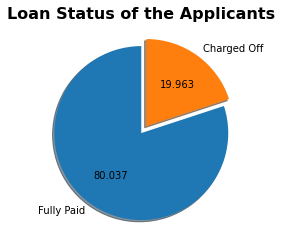

In [35]:
data = df_Accepted["loan_status"].value_counts()
plt.pie(data, labels=data.index, startangle = 90, shadow = True, explode= [0,0.1], autopct='%.3f')
plt.title("Loan Status of the Applicants", fontsize=16, fontweight='bold')
plt.show()

In [36]:
df_Accepted.shape

(1345310, 19)

In [37]:
df_Accepted.head()

,loan_amnt,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,loan_status,purpose,zip_code,addr_state,dti,fico_range_low,fico_range_high,pub_rec,application_type
0,3600.000,36 months,13.990,123.030,C,C4,leadman,10+ years,MORTGAGE,55000.000,Fully Paid,debt_consolidation,190xx,PA,5.910,675.000,679.000,0.000,Individual
1,24700.000,36 months,11.990,820.280,C,C1,Engineer,10+ years,MORTGAGE,65000.000,Fully Paid,small_business,577xx,SD,16.060,715.000,719.000,0.000,Individual
2,20000.000,60 months,10.780,432.660,B,B4,truck driver,10+ years,MORTGAGE,63000.000,Fully Paid,home_improvement,605xx,IL,10.780,695.000,699.000,0.000,Joint App
4,10400.000,60 months,22.450,289.910,F,F1,Contract Specialist,3 years,MORTGAGE,104433.000,Fully Paid,major_purchase,174xx,PA,25.370,695.000,699.000,0.000,Individual
5,11950.000,36 months,13.440,405.180,C,C3,Veterinary Tecnician,4 years,RENT,34000.000,Fully Paid,debt_consolidation,300xx,GA,10.200,690.000,694.000,0.000,Individual


In [38]:
df_Accepted.dtypes

loan_amnt           float64
term                 object
int_rate            float64
installment         float64
grade                object
sub_grade            object
emp_title            object
emp_length           object
home_ownership       object
annual_inc          float64
loan_status          object
purpose              object
zip_code             object
addr_state           object
dti                 float64
fico_range_low      float64
fico_range_high     float64
pub_rec             float64
application_type     object
dtype: object

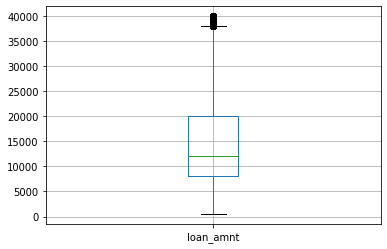

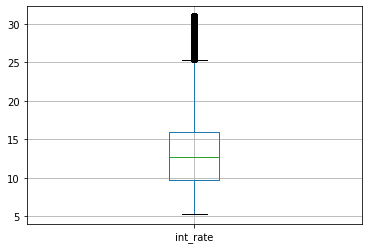

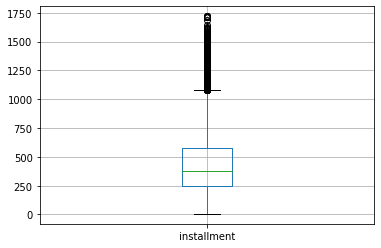

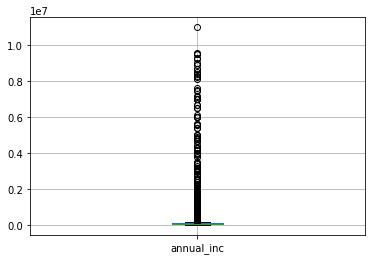

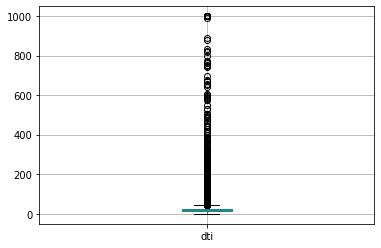

In [39]:
#Let's Explore the Numerical data by using Boxplot (so we can understand the outliers):

import matplotlib.pyplot as plt

List = ["loan_amnt","int_rate","installment","annual_inc", "dti"]

for column in List:
    plt.figure()
    df_Accepted.boxplot([column])

so the above shown features are having outliers, so we need to remove outliers.

In [40]:
df_Accepted.isnull().sum()

loan_amnt               0
term                    0
int_rate                0
installment             0
grade                   0
sub_grade               0
emp_title           85785
emp_length          78511
home_ownership          0
annual_inc              0
loan_status             0
purpose                 0
zip_code                1
addr_state              0
dti                   374
fico_range_low          0
fico_range_high         0
pub_rec                 0
application_type        0
dtype: int64

**1) LOAN AMOUNT:**

In [41]:
df_Accepted["loan_amnt"].describe()

count   1345310.000
mean      14419.972
std        8717.051
min         500.000
25%        8000.000
50%       12000.000
75%       20000.000
max       40000.000
Name: loan_amnt, dtype: float64

They've not provided loan more than 40000 Dollars.

In [42]:
df_Accepted.describe()

,loan_amnt,int_rate,installment,annual_inc,dti,fico_range_low,fico_range_high,pub_rec
count,1345310.000,1345310.000,1345310.000,1345310.000,1344936.000,1345310.000,1345310.000,1345310.000
mean,14419.972,13.240,438.076,76247.636,18.283,696.185,700.185,0.215
std,8717.051,4.769,261.513,69925.098,11.160,31.853,31.853,0.602
min,500.000,5.310,4.930,0.000,-1.000,625.000,629.000,0.000
25%,8000.000,9.750,248.480,45780.000,11.790,670.000,674.000,0.000
50%,12000.000,12.740,375.430,65000.000,17.610,690.000,694.000,0.000
75%,20000.000,15.990,580.730,90000.000,24.060,710.000,714.000,0.000
max,40000.000,30.990,1719.830,10999200.000,999.000,845.000,850.000,86.000


**2) INTEREST RATE:**

general loan principle is, a good trust worthy customer will get loan easily with less interest rate for his credibility(Also his risk score(FICO Score), debt to income ratio both are well maintained in an appropriate level).

Then a customer with less Risk score and high DTI are always risky customers, generally banks and lenders charge them more interest.

In [43]:
df_Accepted["int_rate"].describe()

count   1345310.000
mean         13.240
std           4.769
min           5.310
25%           9.750
50%          12.740
75%          15.990
max          30.990
Name: int_rate, dtype: float64

**OUTLIER DETECTION USING INTER QURTILE RANGE:**

In [44]:


Q1 = np.quantile(df_Accepted["int_rate"],0.25)
Q3 = np.quantile(df_Accepted["int_rate"],0.75)
IQR = Q3 - Q1

Low_outliers = Q1-1.5*IQR
High_outliers = Q3+1.5*IQR

print("Low_outliers :", round(Low_outliers,4))
print("High_outliers :", round(High_outliers,4))

print("Q1 :",Q1)
print("Q3 :", Q3)
print("IQR :", IQR)

Low_outliers : 0.39
High_outliers : 25.35
Q1 : 9.75
Q3 : 15.99
IQR : 6.24


**OUTLIER DETECTION USING Z-SCORE TECHNIQUE:**

**Z score = (x -mean) / std. deviation**

A normal distribution is shown below and it is estimated that,

* 68% of the data points lie between +/- 1 standard deviation.
* 95% of the data points lie between +/- 2 standard deviation
* 99.7% of the data points lie between +/- 3 standard deviation

In [45]:
data = df_Accepted["int_rate"] 
mean = round(np.mean(data) , 4)
std = round(np.std(data),4)
print('mean of the dataset is', mean) 
print('std. deviation is', std)


threshold = 3
outlier = [] 
for i in data: 
    z = (i-mean)/std 
    if z > threshold: 
        outlier.append(i)

print('outlier in dataset is', outlier)

mean of the dataset is 13.2396
std. deviation is 4.7687
outlier in dataset is [27.99, 28.49, 28.99, 28.99, 28.49, 27.99, 28.99, 27.99, 27.99, 27.88, 28.99, 28.49, 28.49, 27.88, 27.88, 27.88, 28.49, 28.99, 27.88, 28.99, 28.49, 28.99, 27.88, 27.88, 28.49, 27.88, 27.88, 28.49, 28.49, 28.49, 27.88, 28.49, 27.88, 27.88, 28.49, 28.49, 27.88, 27.88, 27.88, 28.99, 28.49, 28.49, 28.99, 27.88, 28.49, 28.49, 27.88, 27.88, 28.99, 28.49, 27.88, 28.49, 28.99, 27.88, 27.88, 27.88, 27.88, 27.88, 27.88, 27.88, 28.49, 28.49, 27.88, 27.88, 28.49, 28.99, 27.88, 28.49, 28.99, 27.88, 28.99, 27.88, 28.49, 28.49, 27.88, 27.88, 27.88, 27.88, 27.88, 28.49, 27.88, 27.88, 27.88, 27.88, 28.99, 28.49, 27.88, 27.88, 28.99, 27.88, 27.88, 27.88, 28.99, 27.88, 27.88, 28.49, 28.99, 28.49, 28.49, 28.49, 28.49, 28.49, 27.88, 28.99, 28.49, 27.88, 28.49, 28.99, 27.88, 28.99, 28.99, 27.88, 27.88, 28.99, 27.88, 28.49, 27.88, 27.88, 28.49, 28.99, 27.88, 27.88, 28.99, 27.88, 27.88, 28.99, 27.88, 27.88, 27.88, 28.49, 27.88, 28.4

In [46]:
min(outlier)

27.79

In [47]:
len(outlier)

9764

Since based on two outlier detection techniques like IQR, Z-score method we got 25.35 and 27.79. So **let's drop outlier interest rate with Z-score technique of 27.79**.

In [48]:
df_Accepted["loan_status"][df_Accepted["int_rate"]>=27.79].value_counts()

Charged Off    4916
Fully Paid     4848
Name: loan_status, dtype: int64

In [49]:
outlier_interest_rate = df_Accepted[df_Accepted["int_rate"]>=27.79].index

In [50]:
outlier_interest_rate_Remove = []
for i in outlier_interest_rate:
  outlier_interest_rate_Remove.append(i)

print(outlier_interest_rate_Remove)
print(len(outlier_interest_rate_Remove))

[809, 878, 2668, 2746, 4029, 4807, 5747, 6680, 6961, 7090, 7975, 9879, 11111, 11804, 13348, 14532, 15004, 15046, 15371, 15374, 16493, 16634, 16862, 18050, 19480, 21144, 21170, 21495, 22271, 23121, 24063, 25548, 25629, 25949, 26276, 27260, 27810, 28096, 28224, 28635, 30254, 31425, 31627, 32405, 32460, 33589, 34356, 34411, 35228, 35256, 35731, 36350, 36598, 36674, 36871, 37395, 38881, 39271, 39871, 40645, 41075, 41290, 41739, 41920, 42027, 44216, 44630, 45620, 45977, 46433, 46531, 47530, 47740, 47829, 47986, 49499, 49735, 50667, 51036, 51427, 53269, 55114, 55651, 56560, 56876, 57138, 58383, 58640, 58649, 59103, 59832, 60264, 60330, 60340, 61092, 61434, 62497, 64171, 65195, 65937, 66223, 67498, 68191, 69893, 69903, 73448, 74255, 74320, 75901, 78064, 78954, 83832, 84256, 84851, 86145, 86589, 87792, 89833, 90824, 91955, 92648, 95035, 95171, 97708, 97963, 99449, 99954, 100679, 100863, 101010, 102780, 103030, 103190, 103363, 105017, 105178, 105779, 106222, 108315, 108703, 109618, 110593, 1108

In [51]:
df_Accepted.shape

(1345310, 19)

In [52]:
df_Accepted.drop(outlier_interest_rate_Remove, axis=0, inplace=True)

In [53]:
df_Accepted.shape

(1335546, 19)

**ANNUAL INCOME**


In [54]:
df_Accepted["annual_inc"].describe()

count    1335546.000
mean       76270.453
std        70074.778
min            0.000
25%        45760.000
50%        65000.000
75%        90000.000
max     10999200.000
Name: annual_inc, dtype: float64



Based on annual income summary, the mean income of the US employees is 65000 Dollars and 25% and 75% is respectively 45780 and 90000 Dollars.

**OUTLIER DETECTION USING INTER QURTILE RANGE:**

In [55]:

Q1 = np.quantile(df_Accepted["annual_inc"],0.25)
Q3 = np.quantile(df_Accepted["annual_inc"],0.75)
IQR = Q3 - Q1

Low_outliers = Q1-1.5*IQR
High_outliers = Q3+1.5*IQR

print("Q1 :",Q1)
print("Q3 :", Q3)
print("IQR :", IQR)
print("Low_outliers :", round(Low_outliers,4))
print("High_outliers :", round(High_outliers,4))

Q1 : 45760.0
Q3 : 90000.0
IQR : 44240.0
Low_outliers : -20600.0
High_outliers : 156360.0


**OUTLIER DETECTION USING Z-SCORE TECHNIQUE:**

Z score = (x -mean) / std. deviation

In [56]:
data = df_Accepted["annual_inc"]
mean = round(np.mean(data) , 4)
std = round(np.std(data),4)
print('mean of the dataset is', mean) 
print('std. deviation is', std)

threshold1 = -3
threshold2 =  3
outlier_annual_income = [] 
for i in data: 
    z = (i-mean)/std 
    if z < threshold1 or z > threshold2: 
        outlier_annual_income.append(i)

print("outliers in the dataset :", outlier_annual_income)

mean of the dataset is 76270.4529
std. deviation is 70074.7519
outliers in the dataset : [297000.0, 300000.0, 450000.0, 300000.0, 415000.0, 650000.0, 300000.0, 300000.0, 295000.0, 296000.0, 350000.0, 450000.0, 370000.0, 300000.0, 400000.0, 525000.0, 425000.0, 333600.0, 675000.0, 300000.0, 370000.0, 290000.0, 520000.0, 350000.0, 450000.0, 300000.0, 400000.0, 600000.0, 300000.0, 350000.0, 350000.0, 300000.0, 325000.0, 550000.0, 300000.0, 300000.0, 430000.0, 600000.0, 369000.0, 750000.0, 305000.0, 374000.0, 1400000.0, 400000.0, 300000.0, 424000.0, 3964280.0, 450000.0, 400000.0, 300000.0, 1000000.0, 400000.0, 300000.0, 550000.0, 320000.0, 350000.0, 300000.0, 360000.0, 594000.0, 300000.0, 325000.0, 300000.0, 400000.0, 396000.0, 300000.0, 400000.0, 315000.0, 350000.0, 475000.0, 500000.0, 300000.0, 306000.0, 2300000.0, 300000.0, 385000.0, 450000.0, 400000.0, 400000.0, 300000.0, 550000.0, 305000.0, 425000.0, 400000.0, 400000.0, 370000.0, 350000.0, 399000.0, 320000.0, 300000.0, 305000.0, 300000

In [57]:
print(min(outlier_annual_income))
print(len(outlier_annual_income))

286800.0
9964


In [58]:
Outlier_Annual_inc = (df_Accepted[df_Accepted["annual_inc"]>=286800.0].index)
Outlier_Annual_inc

Int64Index([    213,     557,     651,    1089,    1122,    1482,    1487,
               1694,    2028,    2069,
            ...
            2259257, 2259331, 2259556, 2259605, 2259800, 2260011, 2260306,
            2260340, 2260416, 2260582],
           dtype='int64', length=9964)

In [59]:
Outlier_Annual_inc_Remove = []

for i in Outlier_Annual_inc:
  Outlier_Annual_inc_Remove.append(i)

print(Outlier_Annual_inc_Remove)

[213, 557, 651, 1089, 1122, 1482, 1487, 1694, 2028, 2069, 2145, 2224, 2277, 2303, 2329, 2928, 2982, 3072, 3386, 3561, 3577, 3678, 3709, 3718, 3764, 4185, 4672, 4723, 4899, 5020, 5110, 5290, 5308, 5331, 5363, 5614, 5745, 5828, 6386, 6402, 6508, 6704, 6975, 7082, 7173, 7199, 7239, 7421, 7431, 7595, 7666, 7686, 7782, 8055, 8196, 8207, 8243, 8350, 8420, 8427, 8560, 8582, 8607, 8660, 8834, 9018, 9233, 9236, 9390, 9452, 9727, 9766, 10404, 10604, 10797, 10836, 11100, 11128, 11139, 11517, 11842, 11843, 11970, 12004, 12097, 12164, 12224, 12484, 12494, 12504, 13254, 13303, 13344, 13670, 13736, 13751, 13823, 14158, 14250, 14312, 14330, 14977, 14987, 15048, 15062, 15267, 15487, 15707, 15722, 15732, 15800, 15859, 15920, 16027, 16256, 16486, 16729, 16787, 16792, 16795, 16810, 17311, 17375, 17475, 17488, 17619, 17723, 17736, 17967, 18060, 18481, 18513, 18535, 18598, 18618, 18991, 19074, 19142, 19227, 19238, 19410, 19500, 19637, 19986, 20151, 20159, 20225, 20370, 20546, 20614, 20807, 20857, 20872, 214

In [60]:
df_Accepted.shape

(1335546, 19)

In [61]:
df_Accepted.drop(Outlier_Annual_inc_Remove, axis=0, inplace=True)

In [62]:
df_Accepted.shape

(1325582, 19)

**What Is Debt-to-Income (DTI) Ratio?**

The debt-to-income (DTI) ratio is the percentage of your gross monthly income that goes to paying your monthly debt payments and is used by lenders to determine your borrowing risk.

**DTI= (Total of Monthly Debt Payments / Gross Monthly Income)** 

In this dataset it is DTI percentage have given

Generally Debt to income ratio lower than 18% Considered Excellent. 18% to 35% is considered very good percentage(Less than 36% or upto 35% dti percentage shows that you are in a very good financial condition). **Based on 2021 Lending club's fact, having at least 40% of DTI percentage will help the borrowers to get loan**.

Though 43% is a maximum debt to income percentage a borrower can have for Qulifying loans. because borrowers with more than 43% of dti percentage will find difficulty in paying their bills.

In [63]:
#Let's Check the Null:

df_Accepted["dti"].isnull().sum()

361

In [64]:
# Let's Check the Output result ratio for these 374 DTI null values

In [65]:
df_Accepted["loan_status"][df_Accepted["dti"].isnull()].value_counts()

Fully Paid     295
Charged Off     66
Name: loan_status, dtype: int64

In [66]:
df_Accepted.dropna(subset=["dti"], axis=0, inplace=True)

In [67]:
df_Accepted.shape

(1325221, 19)

We can Drop DTI percentage which is more than 40%. 
But still let's check outliers using IQR and Z-SCORE:

**OUTLIER DETECTION USING INTER QURTILE RANGE:**

In [68]:
Q1 = np.quantile(df_Accepted["dti"],0.25)
Q3 = np.quantile(df_Accepted["dti"],0.75)
IQR = Q3 - Q1

Low_outliers = Q1-1.5*IQR
High_outliers = Q3+1.5*IQR

print("Q1 :",Q1)
print("Q3 :", Q3)
print("IQR :", IQR)
print("Low_outliers :", round(Low_outliers,4))
print("High_outliers :", round(High_outliers,4))

Q1 : 11.86
Q3 : 24.06
IQR : 12.2
Low_outliers : -6.44
High_outliers : 42.36


In [72]:
data = df_Accepted["dti"] 
mean = round(np.mean(data) , 4)
std = round(np.std(data),4)
print('mean of the dataset is', mean) 
print('std. deviation is', std)


threshold1 = -3
threshold2 =  3
outlier = [] 
for i in data: 
    z = (i-mean)/std 
    if z < threshold1 or z > threshold2: 
        outlier.append(i)

print('outlier in the dataset:', outlier)
print('DTI threshold:', min(outlier))
print('Length of the outlier:', len(outlier))

mean of the dataset is 18.3107
std. deviation is 11.0569
outlier in the dataset: [83.64, 999.0, 83.4, 137.4, 89.83, 52.8, 58.54, 59.18, 59.26, 100.09, 68.41, 52.45, 90.0, 57.14, 69.35, 54.1, 120.66, 54.36, 54.19, 61.21, 67.5, 380.53, 59.26, 672.52, 63.64, 125.25, 64.99, 60.08, 71.4, 68.3, 104.0, 54.43, 58.43, 63.0, 112.2, 78.64, 60.99, 60.2, 93.0, 531.33, 57.49, 359.69, 66.61, 55.52, 59.83, 51.98, 53.15, 110.9, 72.67, 65.24, 55.87, 54.22, 99.18, 108.71, 79.59, 69.47, 51.99, 53.4, 117.71, 86.31, 55.11, 53.23, 56.46, 55.28, 549.53, 92.29, 55.62, 56.0, 61.46, 251.6, 65.84, 52.81, 94.12, 52.28, 61.4, 64.82, 62.85, 288.08, 60.06, 54.4, 65.22, 65.73, 112.32, 65.8, 54.2, 62.83, 56.62, 59.59, 209.1, 97.03, 57.84, 460.21, 67.68, 55.4, 70.28, 999.0, 55.78, 75.87, 75.54, 71.63, 58.4, 116.21, 51.97, 131.35, 59.97, 58.95, 54.98, 54.22, 63.39, 62.66, 106.03, 70.54, 57.31, 75.4, 75.25, 57.68, 62.16, 131.1, 129.11, 77.27, 56.62, 90.29, 61.97, 82.27, 142.16, 60.33, 94.29, 62.92, 71.59, 67.35, 55.22, 77

**BELOW CODES STILL NEED TO BE REFINED IN THE UPCOMING DAYS**

In [72]:
5/-*

In [ ]:
df_Accepted["Monthly_debt_payments"] = (df_Accepted["dti"]/100) * (df_Accepted["annual_inc"]/12)

In [ ]:
df_Accepted[["Monthly_debt_payments", "annual_inc", "dti"]]

In [ ]:
df_Accepted["dti"][df_Accepted["dti"] < 0]

In [ ]:
df_Accepted.loc[[1014615,1681348],:]

In [ ]:
df_Accepted["loan_status"][df_Accepted["dti"]>43].value_counts()

In [ ]:
df_Accepted[["loan_amnt","term","int_rate","installment","grade","sub_grade", "annual_inc", "dti"]][df_Accepted["loan_status"]=="Fully Paid"].describe()

In [ ]:
df_Accepted[["loan_amnt","term","int_rate","installment","grade","sub_grade", "annual_inc", "dti"]][df_Accepted["loan_status"]=="Charged Off"].describe()

In [ ]:
df_Accepted["loan_status"][df_Accepted["annual_inc"]<1000].value_counts()

In [ ]:
df_Accepted["loan_status"][df_Accepted["annual_inc"]<=5000].value_counts()

In [ ]:
(len(df_Accepted["loan_status"][df_Accepted["annual_inc"]<=5000].index) / df_Accepted.shape[0])*100

In [ ]:
df_Accepted.shape[0]

In [ ]:
df_Accepted[df_Accepted["loan_status"] == "Fully Paid"].shape

In [ ]:
df_Accepted[df_Accepted["loan_status"] == "Charged Off"].shape

In [ ]:
df_Accepted.groupby(df_Accepted["loan_status"])

In [ ]:
df_Accepted.shape

In [ ]:
df_Accepted.columns

In [ ]:
df_Description.loc[['loan_amnt', 'term', 'int_rate', 'installment', 'grade', 'sub_grade',
       'emp_title', 'emp_length', 'home_ownership', 'annual_inc',
       'loan_status', 'purpose', 'zip_code', 'addr_state', 'dti',
       'fico_range_low', 'fico_range_high', 'pub_rec', 'application_type']]

In [ ]:
Customers_dti_high = df_Accepted["dti"][df_Accepted["dti"] > 43].index

In [ ]:
df_Accepted.loc[Customers_dti_high].describe()

**Fico Score low and high Analysis:**

Generally Fico Scores ranging from **300 to 850**.

(i) Fico score 800+ is **perfect one** 
(ii) **Good range** is from 670 to 739
(iii) And ranging from 580 to 669 is **considered Fair**
(iv) Less than 580 (300 to 579) is **very poor**.


In [ ]:
df_Accepted[["fico_range_low","fico_range_high"]][df_Accepted["loan_status"]=="Fully Paid"].describe()

In [ ]:
df_Accepted[["fico_range_low","fico_range_high"]][df_Accepted["loan_status"]=="Charged Off"].describe()

The FICO Score of **Fully Paid Customers is ranging from 625 to 850** and **Charged Off(Defaulters) customers is ranging from 660 to 850**.. which clearly shows that to borrow from lending club the **borrowers FICO score must be Perfect, Good or at least Fair**.

**if the Loan Applicant FICO Score is less than 625, most probably the loan applications are getting Rejected.**

So we can reject these two Features confidently


In [ ]:
df_Accepted[["zip_code", "addr_state","pub_rec"]]

In [ ]:
pd.options.display.float_format = '{:3f}'.format

In [ ]:
print(df_Accepted[["int_rate","dti"]].min())
print()
print(df_Accepted[["int_rate","dti"]].max())

In [ ]:
df_Accepted["loan_status"].value_counts()

In [ ]:
df_Accepted['loan_status'].value_counts()

In [ ]:
df_Accepted['loan_status'].unique()

In [ ]:
df_Accepted['grade'].unique()

In [ ]:
df_Accepted['sub_grade'].unique()

In [ ]:
df_Accepted.head().T  #Looks easy to read all the feature

In [ ]:
# Let me print max rows so that i can see all the features:

pd.options.display.max_rows = 151

In [ ]:
df_Accepted.head(3).T

In [ ]:
df_Accepted["grade"].unique()

In [ ]:
df_Accepted["grade"].value_counts()

In [ ]:
len(df_Accepted["grade"].unique())

In [ ]:
df_Accepted["int_rate"].value_counts().sort_values()

In [ ]:
df_Accepted.groupby("grade")["int_rate"].mean()

In [ ]:
df_Accepted["sub_grade"].unique()

In [ ]:
len(df_Accepted["sub_grade"].unique())

In [ ]:
df_Accepted["sub_grade"].value_counts()

In [ ]:
df_Accepted.groupby("sub_grade")["int_rate"].mean()

In [ ]:
df_Accepted.groupby("grade")["int_rate"].mean()

In [ ]:
u=df_Accepted["grade"].unique()
for i in range(len(u)):
  print(u[i])
  print(df_Accepted[df_Accepted["grade"]== u[i] ].shape[0])

In [ ]:
df_Accepted[df_Accepted["grade"]== "A"].shape

In [ ]:
df_Accepted['grade'].isnull().sum()

In [ ]:
df_Accepted["emp_length"].value_counts()  #Replacement needed from strings to int

DBI RATIO:


In [ ]:
df_Accepted["dti"][df_Accepted["loan_status"]=="Fully Paid"].describe()

In [ ]:
df_Accepted["dti"][df_Accepted["dti"]>43][df_Accepted["loan_status"]=="Fully Paid"].describe()

In [ ]:
df_Accepted["dti"][df_Accepted["dti"]>43][df_Accepted["loan_status"]=="Charged Off"].describe()

In [ ]:
df_Accepted["dti"]

In [ ]:
# @@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@

In [ ]:
#OUTLIER DETECTION USING INTER QURTILE RANGE:

Q1 = np.quantile(df_Rejected['Debt-To-Income Ratio'],0.25)
Q3 = np.quantile(df_Rejected['Debt-To-Income Ratio'],0.75)
IQR = Q3 - Q1

Low_outliers = Q1-1.5*IQR
High_outliers = Q3+1.5*IQR

print(Low_outliers)
print(High_outliers)

print(Q1)
print(Q3)
print(IQR)

In [ ]:
'''
#OUTLIER DETECTION USING Z-SCORE TECHNIQUE:

Z score = (x -mean) / std. deviation

A normal distribution is shown below and it is estimated that,

* 68% of the data points lie between +/- 1 standard deviation.
* 95% of the data points lie between +/- 2 standard deviation
* 99.7% of the data points lie between +/- 3 standard deviation '''

data = [ 1,2,3,4,5,6,4,1,3,5,1,2,3,4,5,6,4,1,3,5,1,2,3,4,5,6,4,1,3,5,1,2,3,4,5,6,4,1,3,5,1,2,3,4,5,6,4,1,3,5,1,2,3,4,5,6,4,1,3,5,1,2,3,4,5,6,4,1,3,5,1,2,
        3,4,5,6,4,1,3,5,1,2,3,4,5,6,4,1,3,5,1,2,3,4,5,6,4,1,3,5,1,2,3,4,5,6,4,1,3,5,1,2,3,4,5,6,4,1,3,5,1,2,1,3,5,1,2,3,4,5,6,4,1,3,5,-8500,8500,7000,-6800] 
mean = round(np.mean(data) , 4)
std = round(np.std(data),4)
print('mean of the dataset is', mean) 
print('std. deviation is', std)


threshold1 = -3
threshold2 =  3
outlier = [] 
for i in data: 
    z = (i-mean)/std 
    if z < threshold1 or z > threshold2: 
        outlier.append(i)

print('outlier in the dataset:', outlier)

**Let's devide the Charged off customers into 3 varieties:**

* one with interest rate of 0 - 10%
* another with interest rate of 10 - 20%
* another with interest rate of 20 - 31%

In [ ]:
len(df_Accepted["loan_status"]=="Charged Off")

In [ ]:
#one with interest rate of 0 - 10%:

df_Accepted[["loan_amnt","int_rate","annual_inc","dti"]][df_Accepted["loan_status"] == "Charged Off"][df_Accepted["int_rate"]>0][df_Accepted["int_rate"]<=10]

In [ ]:
#another with interest rate of 10 - 20%

df_Accepted[["loan_amnt","int_rate","annual_inc","dti"]][df_Accepted["loan_status"] == "Charged Off"][df_Accepted["int_rate"]>10][df_Accepted["int_rate"]<=20]

In [ ]:
#another with interest rate of 20 - 31%

df_Accepted[["loan_amnt","int_rate","annual_inc","dti"]][df_Accepted["loan_status"] == "Charged Off"][df_Accepted["int_rate"]>20][df_Accepted["int_rate"]<=25.5]

In [ ]:
#Outlier data:
df_Accepted[["annual_inc","loan_amnt","dti","int_rate"]][df_Accepted["int_rate"]>25.35][df_Accepted["loan_status"] == "Charged Off"].sort_values(["annual_inc","loan_amnt","dti","int_rate"], ascending=False)

In [ ]:
df_Accepted[["annual_inc","loan_amnt","dti","int_rate"]][df_Accepted["annual_inc"]>500000][df_Accepted["loan_status"] == "Fully Paid"].sort_values(["annual_inc","loan_amnt","dti","int_rate"], ascending=False)

In [ ]:
df_Accepted[["loan_amnt","int_rate","annual_inc","dti"]][df_Accepted["loan_status"] == "Charged Off"][df_Accepted["int_rate"]>15].sort_values(["dti","int_rate","loan_amnt","annual_inc"], ascending=False)